In [10]:
# Using Long Short Term Memory (LSTM) based off of the current decade to predict the closing stock price for 
# Amazon (current day) using the past 60 day stock price.

In [100]:
import math
import pandas as pd
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [101]:
# Start/End Date for Comparison
Start_Date = '2020-01-01'
End_Date = datetime.datetime.today() - datetime.timedelta(days=1)
Current_Date = datetime.date.today()

yf.pdr_override()
df = pdr.get_data_yahoo('AMZN', start=Start_Date, end=End_Date)
data = df.filter(['Close'])
data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,94.900497
2020-01-03,93.748497
2020-01-06,95.143997
2020-01-07,95.343002
2020-01-08,94.598503
...,...
2023-08-21,134.679993
2023-08-22,134.250000
2023-08-23,135.520004


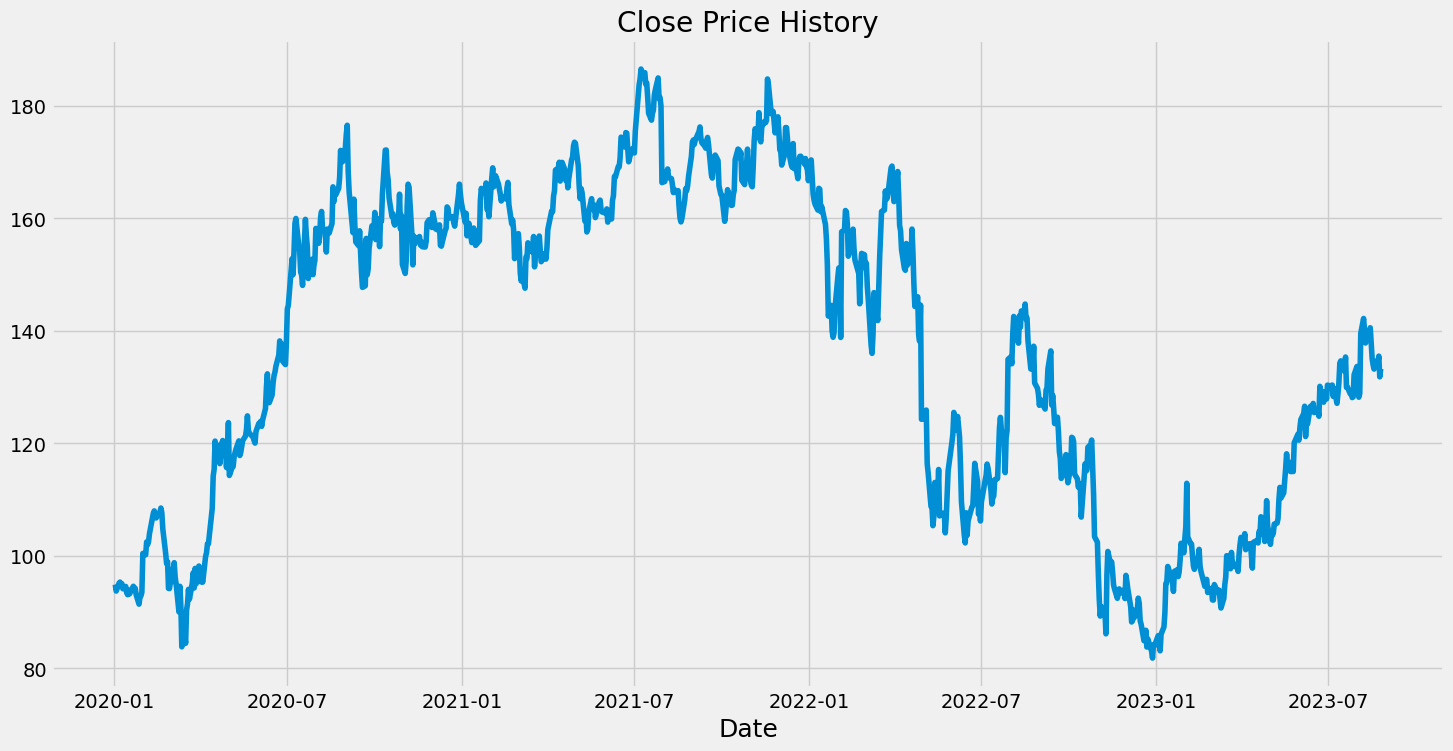

In [102]:
# Creating a plot (using matplotlib) for the close prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data)
plt.xlabel('Date', fontsize=18)
plt.show()

In [103]:
# Scale Data
dataset = data.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.1248729 ]
 [0.11387533]
 [0.12719746]
 [0.12909727]
 [0.12198991]
 [0.12632397]
 [0.11778462]
 [0.12167009]
 [0.11123575]
 [0.10769398]
 [0.11529304]
 [0.10898278]
 [0.12200418]
 [0.11983715]
 [0.11846241]
 [0.10751263]
 [0.09161771]
 [0.10350785]
 [0.10577517]
 [0.1118276 ]
 [0.17771751]
 [0.17556002]
 [0.19726396]
 [0.1925862 ]
 [0.19753126]
 [0.21139754]
 [0.23747385]
 [0.24553584]
 [0.24992722]
 [0.24509192]
 [0.23793205]
 [0.24786041]
 [0.25480549]
 [0.24663367]
 [0.21936412]
 [0.17798962]
 [0.16054341]
 [0.16381307]
 [0.11832876]
 [0.11806627]
 [0.15157448]
 [0.13011396]
 [0.16201829]
 [0.13729291]
 [0.12634305]
 [0.07838152]
 [0.12191831]
 [0.08804731]
 [0.01919321]
 [0.07093045]
 [0.02517885]
 [0.08183253]
 [0.09241007]
 [0.11672023]
 [0.10009019]
 [0.12717365]
 [0.14496349]
 [0.11906388]
 [0.15230953]
 [0.1258705 ]
 [0.15634773]
 [0.14955538]
 [0.12949822]
 [0.1348108 ]
 [0.12896835]
 [0.17240493]
 [0.17909225]
 [0.19408024]
 [0.19396568]
 [0.25416106]
 [0.30879091]
 [0.32

In [104]:
# Creating/Filling/Shaping training dataset
training_data_len = math.ceil(len(dataset) * .8)
train_data = scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(676, 60, 1)

In [105]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [106]:
#Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [107]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

676/676 [==============================] - 11s 14ms/step - loss: 0.0076


In [110]:
# Creating/Filling/Reshaping the testing Data Set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(183, 60, 1)

In [111]:
 # Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

6/6 [==============================] - 0s 10ms/step


In [112]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.4505535188268444

C:\Users\edwar\AppData\Local\Temp\ipykernel_15944\1238434462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


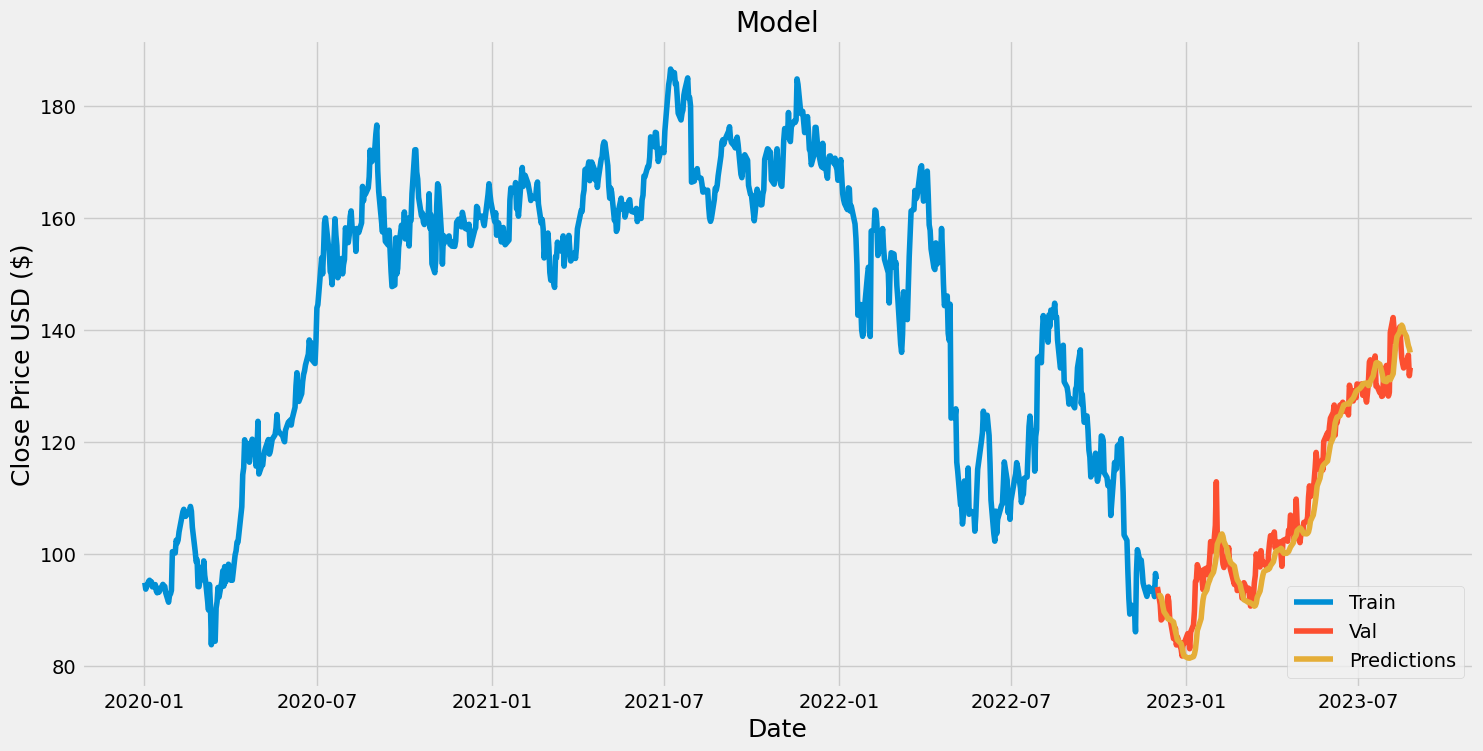

In [113]:
# Plot Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [114]:
# Show the valid and predicted prices
valid.head(10)

,Close,Predictions
Date,,
2022-12-02,94.129997,92.508530
2022-12-05,91.010002,92.620071
2022-12-06,88.250000,92.314865
2022-12-07,88.459999,91.502182
2022-12-08,90.349998,90.506104
2022-12-09,89.089996,89.707375
2022-12-12,90.550003,88.958214
2022-12-13,92.489998,88.470139
2022-12-14,91.580002,88.390465


In [115]:
valid.tail(10)

,Close,Predictions
Date,,
2023-08-14,140.570007,139.641083
2023-08-15,137.669998,140.502029
2023-08-16,135.070007,140.865952
2023-08-17,133.979996,140.588196
2023-08-18,133.220001,139.852081
2023-08-21,134.679993,138.838577
2023-08-22,134.250000,137.965103
2023-08-23,135.520004,137.186783
2023-08-24,131.839996,136.708801


In [116]:
# Predict Today's closing price
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)[0]
print(pred_price)


1/1 [==============================] - 0s 8ms/step
[135.35547]


In [117]:
# Current price
amazon_quote = pdr.get_data_yahoo('AMZN', start=Current_Date, end=Current_Date)['Close'].values
print(amazon_quote)

[*********************100%%**********************]  1 of 1 completed
[133.25999451]


In [118]:
print('Current Price:  ', amazon_quote)
print('Predicted Price:', pred_price)

Current Price:   [133.25999451]
Predicted Price: [135.35547]
